In [1]:
import datetime as dt
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [3]:
# read function csv
def read_csv(file_name):
    df = pd.read_csv(file_name, index_col=0)

    return df

# df = read_csv('DOGE-VOLUME-filtered.csv')
# df['date_timestamp'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [4]:
# # Sort by date
# df = df.sort_values(by='date_timestamp')

# #rename time colum to date
# df.rename(columns={'time': 'date'}, inplace=True)

# # filter df between 2022-01-13 17:00:00 and 2022-01-14 18:00:00
# df = df[(df['date_timestamp'] >= dt.datetime(2022, 1, 13, 17, 0, 0)) & (df['date_timestamp'] <= dt.datetime(2022, 1, 14, 22, 0, 0))]

# # initialise MinMaxScaler 
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# # min max scaler volume column 
# df['volume_norm'] = scaler.fit_transform(df['volume'].values.reshape(-1, 1))

# print(df.head())
# print(df.tail())
# print(len(df))

In [5]:
# fig, ax = plt.subplots(figsize=(12,8))
# ax.plot(df['date_timestamp'], df['volume'], color='blue', label='volume')
# ax.axvline(x=datetime(2022, 1, 14, 6, 18), color='red', linestyle='--', label='14-01-2022 06:18')
# # ax.axvline(x=datetime(2022, 1, 25, 12, 30), color='red', linestyle='--', label='25-01-2022 12:30')
# ax.set_xlabel('Time')
# ax.set_ylabel('Volume')
# ax.set_title('DOGE Volume')
# plt.show()

In [7]:
# df_score = read_csv('DOGE-all_df.csv')
df_score.reset_index(inplace=True)
# Kepp date_timestamp, close_norm, compound_norm, score_norm
df_score = df_score[['date_timestamp', 'close_norm', 'compound_norm', 'score_norm', 'date_x']]

#rename date_x to date
df_score.rename(columns={'date_x': 'date'}, inplace=True)

# df_score['date_timestamp'] = df_score['date_timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))

print(len(df_score))

#print first and last date in df_score
print(df_score.head())
print(df_score.tail())

# print(df.head())

NameError: name 'df_score' is not defined

In [ ]:
# merge df and df_score on date and date_timestamp inner join
df_merged = pd.merge(df, df_score, on=['date_timestamp', 'date_timestamp'], how='inner')

# df_merged = pd.merge(df, df_score, on='date', how='outer')

In [46]:
# print(df_merged.head())

In [29]:
df_merged = df_merged[['date_timestamp', 'volume', 'score']]

In [30]:
print(df_merged.head())

# initialise MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# normalise volume and score
df_merged['volume_norm'] = scaler.fit_transform(df_merged['volume'].values.reshape(-1, 1))
df_merged['score_norm'] = scaler.fit_transform(df_merged['score'].values.reshape(-1, 1))

print(df_merged.head())


       date_timestamp        volume         score
0 2022-01-30 00:00:00  9.460801e+09  2.999990e-07
1 2022-01-29 23:00:00  5.658370e+09 -2.225529e-07
2 2022-01-29 22:00:00  5.468148e+09  1.197643e-07
3 2022-01-29 21:00:00  7.932699e+09 -9.252055e-08
4 2022-01-29 20:00:00  1.393347e+10 -4.621335e-07
       date_timestamp        volume         score  volume_norm  score_norm
0 2022-01-30 00:00:00  9.460801e+09  2.999990e-07     0.087103    0.183646
1 2022-01-29 23:00:00  5.658370e+09 -2.225529e-07     0.013176    0.150283
2 2022-01-29 22:00:00  5.468148e+09  1.197643e-07     0.009478    0.172138
3 2022-01-29 21:00:00  7.932699e+09 -9.252055e-08     0.057394    0.158585
4 2022-01-29 20:00:00  1.393347e+10 -4.621335e-07     0.174061    0.134986


In [43]:
# sort df_merged by date_timestamp
df_merged = df_merged.sort_values(by='date_timestamp')

# keep lines after 2022-01-25 10:00:00
df_merged = df_merged[df_merged['date_timestamp'] > datetime(2022, 1, 25, 10, 0)]

In [51]:
df['date_timestamp'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df_score['date_timestamp'] = df_score['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))

print(df.head())
print(df_score.head())

                     date        volume      date_timestamp  volume_norm
1609  2022-01-13 17:00:00  1.543509e+10 2022-01-13 17:00:00     1.000000
1610  2022-01-13 18:00:00  9.017789e+09 2022-01-13 18:00:00     0.360215
1611  2022-01-13 19:00:00  1.064819e+10 2022-01-13 19:00:00     0.522761
1612  2022-01-13 20:00:00  1.183833e+10 2022-01-13 20:00:00     0.641414
1613  2022-01-13 21:00:00  7.230919e+09 2022-01-13 21:00:00     0.182069
       date_timestamp  close_norm  compound_norm  score_norm              date
0 2022-01-13 17:00:00    0.005405       0.257976    0.719607  2022-01-13 17:00
1 2022-01-13 18:00:00    0.000000       0.057427    0.539362  2022-01-13 18:00
2 2022-01-13 19:00:00    0.008108       0.140812    0.846214  2022-01-13 19:00
3 2022-01-13 20:00:00    0.089189       0.149229    0.394478  2022-01-13 20:00
4 2022-01-13 21:00:00    0.216216       0.206971    0.467599  2022-01-13 21:00


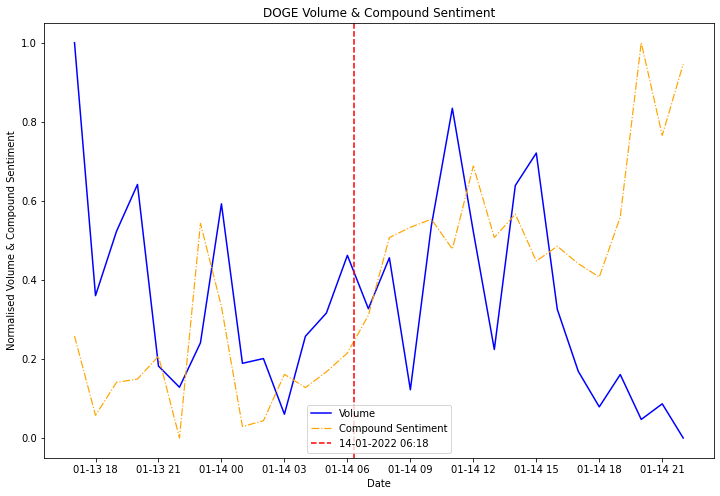

In [59]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date_timestamp'], df['volume_norm'], color='blue', label='Volume', linewidth=1.5)
ax.plot(df_score['date_timestamp'], df_score['compound_norm'], color='orange', label='Compound Sentiment', linestyle='-.', linewidth=1.2)
ax.axvline(x=datetime(2022, 1, 14, 6, 18), color='red', linestyle='--', label='14-01-2022 06:18')
# ax.axvline(x=datetime(2022, 1, 25, 12, 30), color='red', linestyle='--', label='25-01-2022 12:30')
ax.set_xlabel('Date')
ax.set_ylabel('Normalised Volume & Compound Sentiment')
ax.set_title('DOGE Volume & Compound Sentiment')
plt.legend()
plt.show()

In [ ]:
# find max of score and save date_timestamp
max_score = df_merged['score_norm'].max()
max_score_date = df_merged[df_merged['score_norm'] == max_score]['date_timestamp'].values[0]
max_score_dt = dt.datetime.utcfromtimestamp(int(max_score_date)/1e9)

# find max of volume and save date_timestamp
max_volume = df_merged['volume_norm'].max()
max_volume_date = df_merged[df_merged['volume_norm'] == max_volume]['date_timestamp'].values[0]
max_volume_dt = dt.datetime.utcfromtimestamp(int(max_volume_date)/1e9)

print('Max score:', max_score, 'at', max_score_dt)
print('Max volume:', max_volume, 'at', max_volume_dt)
print('Difference between max score and max volume in hours is:', abs(max_volume_dt - max_score_dt))

In [58]:
df_plot = read_csv('DOGE-price-filtered.csv')
# print(df_plot.head())


# keep date_timestamp, close_norm, compound_norm, score_norm
# df_plot = df_plot[['date_timestamp', 'close_norm', 'compound_norm', 'score_norm']]

# move  index column as column
df_plot.reset_index(inplace=True)

df_plot['date_timestamp'] = df_plot['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))


# filter df_plot between 12 jan and 30 jan  
df_plot = df_plot[(df_plot['date_timestamp'] > datetime(2022, 1, 13, 0, 0)) & (df_plot['date_timestamp'] < datetime(2022, 1, 25, 0, 0))]

#order df_plot by date_timestamp
df_plot = df_plot.sort_values(by='date_timestamp')
print(df_plot.head())
print(len(df_plot))

# df_plot['date_timestamp'] = df_plot['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))

# filter data after 2022-01-25 10:00
# df_plot = df_plot[df_plot['date_timestamp'] > datetime(2022, 1, 13)]

     index                 time   close      date_timestamp
407   1593  2022-01-13 01:00:00  0.1630 2022-01-13 01:00:00
406   1594  2022-01-13 02:00:00  0.1661 2022-01-13 02:00:00
405   1595  2022-01-13 03:00:00  0.1665 2022-01-13 03:00:00
404   1596  2022-01-13 04:00:00  0.1695 2022-01-13 04:00:00
403   1597  2022-01-13 05:00:00  0.1742 2022-01-13 05:00:00
287


In [59]:
# # initialise MinMaxScaler 


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# normalise volume and score
# df_plot['volume_norm'] = scaler.fit_transform(df_plot['volume'].values.reshape(-1, 1))
# df_plot['score_norm'] = scaler.fit_transform(df_plot['score'].values.reshape(-1, 1))
# df_plot['close_norm'] = scaler.fit_transform(df_plot['close'].values.reshape(-1, 1))

# minmax scale close in df_plot
df_plot['close_norm'] = scaler.fit_transform(df_plot['close'].values.reshape(-1, 1))
print(df_plot)


########################################################################################################################
# print(df_plot.head())
# df_all = read_csv("14.01.2022_Tesla-x-DOGE/DOGE-all_df.csv")
# # reset index
# df_all.reset_index(inplace=True)
# df_all['date_timestamp'] = df_all['date_x'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))
# print(df_all.head())

# # filter data in df_plot between 12-01-2022 and 15-01-2022
# # df_plot = df_plot[(df_plot['date_timestamp'] > datetime(2022, 1, 13, 12,00)) & (df_plot['date_timestamp'] < datetime(2022, 1, 15, 6, 00))]

# # merge df_plot and df_all outer join
# df_merged = pd.merge(df_plot, df_all, how='outer', on='date_timestamp')
# # fil nan to 0
# df_merged = df_merged.fillna(0)

# #filter data after 2022-01-13
# df_price = df_price[df_price['time'] >= '2022-01-13']
# df_price['date_timestamp'] = df_price['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
# # sort df_price by date_timestamp
# df_price = df_price.sort_values(by='date_timestamp')

# # # initialise MinMaxScaler 
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# # normalise close price
# df_price['close_norm'] = scaler.fit_transform(df_price['close'].values.reshape(-1, 1))

# print(df_price.head())

     index                 time   close      date_timestamp  close_norm
407   1593  2022-01-13 01:00:00  0.1630 2022-01-13 01:00:00    0.499318
406   1594  2022-01-13 02:00:00  0.1661 2022-01-13 02:00:00    0.541610
405   1595  2022-01-13 03:00:00  0.1665 2022-01-13 03:00:00    0.547067
404   1596  2022-01-13 04:00:00  0.1695 2022-01-13 04:00:00    0.587995
403   1597  2022-01-13 05:00:00  0.1742 2022-01-13 05:00:00    0.652115
..     ...                  ...     ...                 ...         ...
125   1875  2022-01-24 19:00:00  0.1344 2022-01-24 19:00:00    0.109141
124   1876  2022-01-24 20:00:00  0.1390 2022-01-24 20:00:00    0.171896
123   1877  2022-01-24 21:00:00  0.1374 2022-01-24 21:00:00    0.150068
122   1878  2022-01-24 22:00:00  0.1371 2022-01-24 22:00:00    0.145975
121   1879  2022-01-24 23:00:00  0.1375 2022-01-24 23:00:00    0.151432

[287 rows x 5 columns]


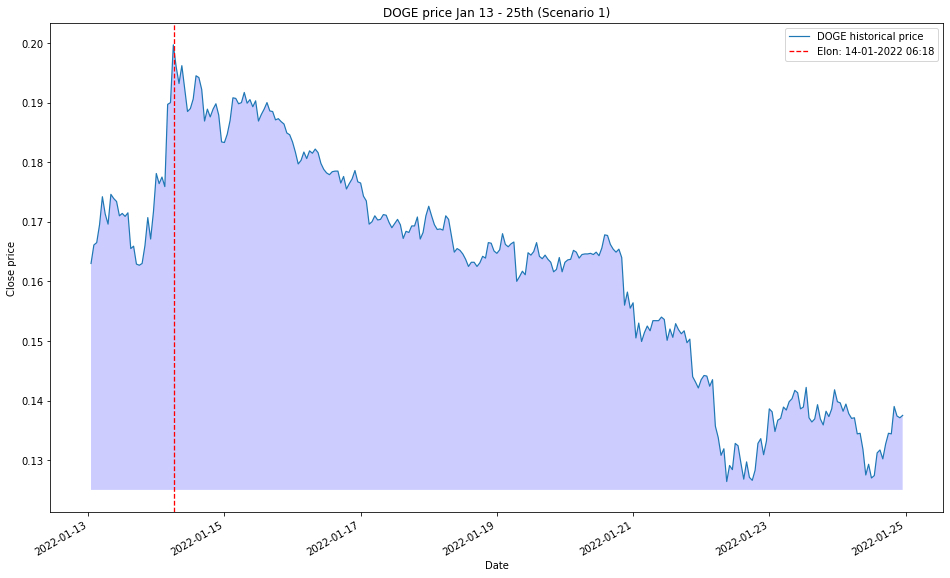

In [65]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(df_plot['date_timestamp'], df_plot['close'], label='DOGE historical price', linewidth=1.2)
# ax.plot(df_merged['date_timestamp'], df_merged['score_norm'], color='orange', label='Sentiment Score', linestyle='-.', linewidth=1)
# ax.plot(df_merged['date_timestamp'], df_merged['compound_norm'], color='orange', label='Compound Sentiment', linestyle='-.', linewidth=1)
ax.axvline(x=datetime(2022, 1, 14, 6, 18), color='red', linestyle='--', label='Elon: 14-01-2022 06:18', linewidth=1.3)

ax.set_title('DOGE price Jan 13 - 25th (Scenario 1)')
ax.set_xlabel('Date')
ax.set_ylabel('Close price')
ax.legend()
# ax.fill_between(df_merged['date_timestamp'], df_merged['volume_norm'], 0, facecolor='blue', alpha=0.2)
# ax.fill_between(df_merged['date_timestamp'], df_merged['close_norm'], 0, facecolor='orange', alpha=0.2)
ax.fill_between(df_plot['date_timestamp'], df_plot['close'], 0.125, facecolor='blue', alpha=0.2)

plt.gcf().autofmt_xdate()
plt.show()

In [110]:
# copy sentiment score to df_test between 26-01-2022 at 10.00 and 12.00
df_test = df_plot[(df_plot['date_timestamp'] >= datetime(2022, 1, 26, 10, 0)) & (df_plot['date_timestamp'] <= datetime(2022, 1, 26, 12, 0))]
# keep only score_norm  
df_test = df_test[['date_timestamp', 'score_norm', 'close_norm']]

print(df_test.head())

# pearson cross correlation between score and close price
corr = df_test['score_norm'].corr(df_test['close_norm'])
print('Pearson correlation between score and close price:', round(corr, 4))

        date_timestamp  score_norm  close_norm
41 2022-01-26 10:00:00    0.213557    0.860927
42 2022-01-26 11:00:00    1.000000    1.000000
43 2022-01-26 12:00:00    0.317779    0.854305
Pearson correlation between score and close price: 0.9868


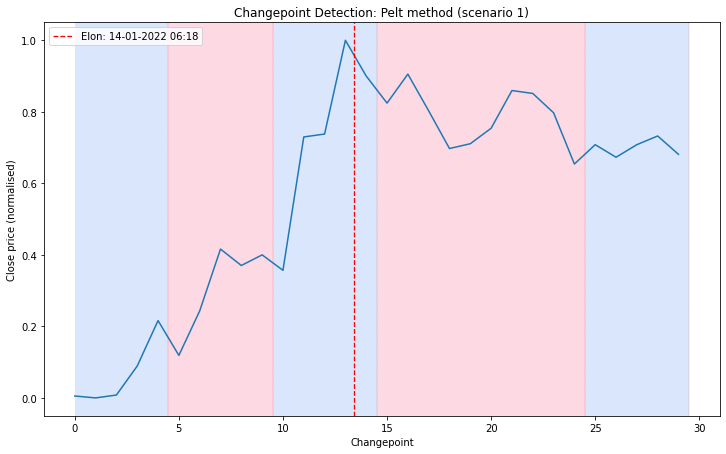

In [186]:
import ruptures as rpt
import numpy as np

def retrieve_time_series(api, series_ID):
    """ Retrieve time series data from the API.
    Parameters
    —------—
    api : API object
    series_ID : string, ID of the time series
    """
    series_search = api.data_by_series(series=series_ID)
    df = pd.DataFrame(series_search)

    return df

###############################################################################
df_plot.rename(columns={'date':'Date'}, inplace=True)
# Create a copy of merged_df to price_df
price_df = df_plot.copy()
points=np.array(price_df['close_norm'])

# Changepoint detection with the Pelt search method. 
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=0.1)
# The red line is the changepoint location in the time series. 
rpt.display(points, result, figsize=(10, 6))
plt.title('Changepoint Detection: Pelt method (scenario 1)')
# fill in the changepoints
for i in range(len(result)):
    plt.axvline(x=result[i]-0.5, color='red', linestyle='--', linewidth=0.2)
# Add label to the changepoints on x-axis
plt.axvline(x=13.4, color='red', linestyle='--', label='Elon: 14-01-2022 06:18', linewidth=1.3)
plt.xlabel('Changepoint')
plt.ylabel('Close price (normalised)')
plt.legend()
plt.show()

### McDonalds: (volume)

In [77]:
 # read DOGE-VOLUME-filtered
df_volume = read_csv('DOGE-VOLUME-filtered.csv')

# rename time to date
df_volume.rename(columns={'time':'date'}, inplace=True)

# filter data between 25 January and 30 January
df_volume = df_volume[df_volume['date'] >= '2022-01-25 11:00:00']
df_volume = df_volume[df_volume['date'] <= '2022-01-30']

df_volume['date_timestamp'] = df_volume['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

# normalise volume
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
df_volume['volume_norm'] = scaler.fit_transform(df_volume['volume'].values.reshape(-1, 1))

print(df_volume.head())

                     date        volume      date_timestamp  volume_norm
1999  2022-01-29 23:00:00  5.658370e+09 2022-01-29 23:00:00     0.013176
1998  2022-01-29 22:00:00  5.468148e+09 2022-01-29 22:00:00     0.009478
1997  2022-01-29 21:00:00  7.932699e+09 2022-01-29 21:00:00     0.057394
1996  2022-01-29 20:00:00  1.393347e+10 2022-01-29 20:00:00     0.174061
1995  2022-01-29 19:00:00  5.626416e+09 2022-01-29 19:00:00     0.012555


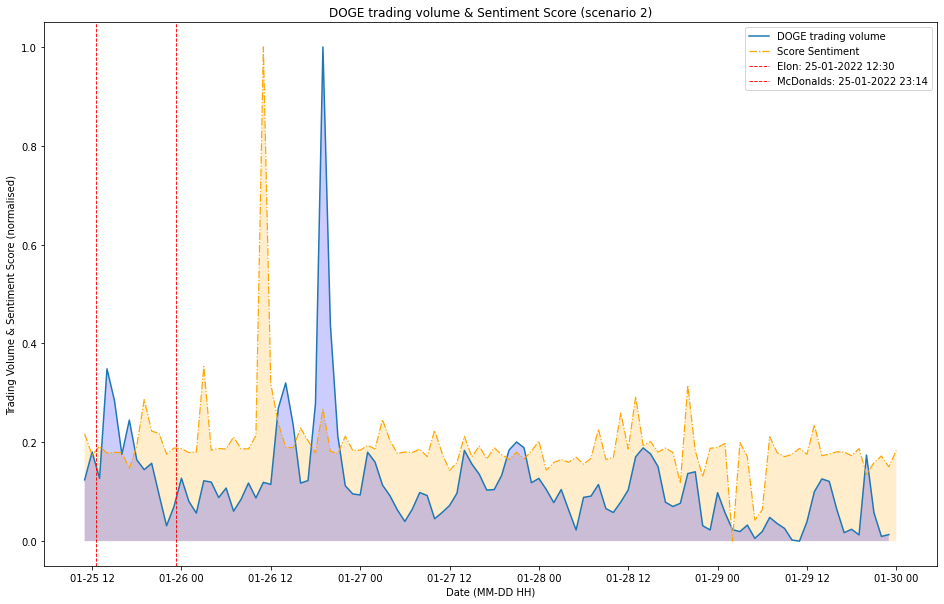

In [87]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(df_volume['date_timestamp'], df_volume['volume_norm'], label='DOGE trading volume', linewidth=1.5)
# add score sentiment line
ax.plot(df_plot['date_timestamp'], df_plot['score_norm'], color='orange', label='Score Sentiment', linestyle='-.', linewidth=1.2)
ax.axvline(x=datetime(2022, 1, 25, 12, 30), color='red', linestyle='--', label='Elon: 25-01-2022 12:30', linewidth=0.9)
ax.axvline(x=datetime(2022, 1, 25, 23, 14), color='red', linestyle='--', label='McDonalds: 25-01-2022 23:14', linewidth=0.9)
ax.set_title('DOGE trading volume & Sentiment Score (scenario 2)')
ax.set_xlabel('Date (MM-DD HH)')
ax.set_ylabel('Trading Volume & Sentiment Score (normalised)')
ax.legend()
ax.fill_between(df_plot['date_timestamp'], df_plot['score_norm'], 0, facecolor='orange', alpha=0.2)
ax.fill_between(df_volume['date_timestamp'], df_volume['volume_norm'], 0, facecolor='blue', alpha=0.2)

plt.show()